# Naive Bayes on Amazon food reviews




The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


### Objective:

1.Apply Naive Bayes on food reviews.find right "alpha".
2.Find Accuracy,precision,recall,f1-score,confusion matrix.
3.Give Feature importance.

In [1]:

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer



import warnings
warnings.filterwarnings("ignore")

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from scipy.sparse import csr_matrix

# Loading the data


The dataset is available in two forms

1) .csv file
2)  SQLite Database




In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently. 
Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative"


Also we sort data by time-based slicing

## Loading Preprocessed Data

I have preprocessed the data separately for 250k points and stored in cleanedreviews.csv

In [63]:
df=pd.read_csv('cleanedreviews.csv')
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witty little book makes son laugh loud recite ...
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,remember seeing show aired television years ag...
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuice well written movie everything exce...
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...
4,4,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...


In [64]:
#array that contains +ve=1 and -ve=0 reviews
y=np.array(df['Score'])

In [65]:
type(y)

numpy.ndarray

In [66]:
df['Class']=['positive' if s==1 else 'negative' for s in df['Score']]

In [7]:
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Class
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witty little book makes son laugh loud recite ...,positive
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,remember seeing show aired television years ag...,positive
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuice well written movie everything exce...,positive
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...,positive
4,4,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...,positive


In [8]:
# split the data set into train and test
x_1,x_test,y_1,y_test=cross_validation.train_test_split(df['Text'], y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr,x_cv,y_tr,y_cv=cross_validation.train_test_split(x_1,y_1,test_size=0.3,random_state=0)

# Bag of Words(BoW) on Reviews(text)

In [12]:
count_vect=CountVectorizer(binary=True,max_features=500).fit(x_tr)

In [13]:
x_tr_vectorised=count_vect.transform(x_tr)

In [14]:
#Obtaining features for feature importance
count_vect.get_feature_names()

['10',
 '100',
 '12',
 '15',
 '20',
 '30',
 '50',
 'able',
 'absolutely',
 'actually',
 'add',
 'added',
 'ago',
 'almost',
 'along',
 'already',
 'also',
 'alternative',
 'although',
 'always',
 'amazing',
 'amazon',
 'amount',
 'another',
 'anyone',
 'anything',
 'aroma',
 'around',
 'arrived',
 'artificial',
 'ate',
 'available',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'bag',
 'bags',
 'bar',
 'bars',
 'based',
 'beans',
 'beef',
 'believe',
 'best',
 'better',
 'big',
 'bit',
 'bite',
 'bitter',
 'black',
 'blend',
 'bold',
 'bottle',
 'bought',
 'bowl',
 'box',
 'boxes',
 'brand',
 'brands',
 'bread',
 'breakfast',
 'brew',
 'brown',
 'bulk',
 'butter',
 'buy',
 'buying',
 'calories',
 'came',
 'candy',
 'canned',
 'cannot',
 'cans',
 'care',
 'case',
 'cat',
 'cats',
 'cereal',
 'change',
 'cheaper',
 'cheese',
 'chew',
 'chicken',
 'chip',
 'chips',
 'chocolate',
 'choice',
 'cinnamon',
 'clean',
 'close',
 'coconut',
 'coffee',
 'coffees',
 'cold',
 'com',
 'come',
 'co

In [15]:
type(count_vect.get_feature_names())

list

In [16]:
features=np.asarray(count_vect.get_feature_names())
type(features)
features.shape

(500,)

## Cross Validation to find right "alpha"

In [17]:
#Importing packages to apply Naive Bayes 
#and to find accuracy ,precision,recall,confusion matrix,f1-score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB    
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Applying Bernoulli Naive Bayes Classifier to find alpha

In [18]:
clf=BernoulliNB()
scores=cross_val_score(clf,x_tr_vectorised,y_tr)
print("the optimal alpha is %f" %scores.mean())

the optimal alpha is 0.872049


In [19]:
a=scores.mean()

### Naive Bayes with optimal alpha

In [20]:
optimal_alpha=BernoulliNB(alpha=a)
optimal_alpha.fit(x_tr_vectorised,y_tr)

pred=optimal_alpha.predict(count_vect.transform(x_test))

#### Accuracy

In [21]:
#accuracy
acc=accuracy_score(y_test,pred)*100
print("The accuracy of our model is %f" %acc)

The accuracy of our model is 87.249333


#### Precision

In [22]:
pre=precision_score(y_test,pred)
print("precision  %f" %(pre*100))

precision  91.376451


#### Recall

In [23]:
recall=recall_score(y_test,pred)
print("Recall  %f" %recall)

Recall  0.940375


## Confusion Matrix

In [24]:
#Source :Scikit learn Confusion matrix

def plot_confusion_matrix(cm, cls=set(df['Class']),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cls))
    plt.xticks(tick_marks, cls, rotation=45)
    plt.yticks(tick_marks, cls)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### Confusion Matrix

In [25]:
c_matrix=confusion_matrix(y_test,pred)
c_matrix

array([[ 4827,  5720],
       [ 3843, 60610]], dtype=int64)

Confusion matrix, without normalization
[[ 4827  5720]
 [ 3843 60610]]


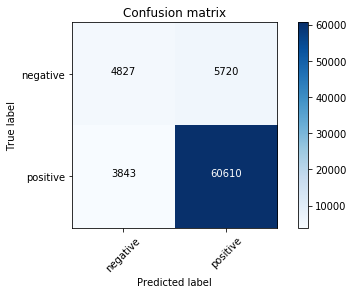

In [26]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test,pred))

#### Observation:
60610 reviews are true positive and 4827 reviews are negative


#### TN,FP,FN,TP

In [27]:
tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()
(tn, fp, fn, tp)

(4827, 5720, 3843, 60610)

#### TPR,TNR,FPR,FNR

In [28]:
df['Score'].value_counts()

1    215035
0     34965
Name: Score, dtype: int64

In [29]:
#No.of positive points p
#No.of negative points nb
p=215035
n=34965

tpr=tp/p

tnr=tn/n

fpr=fp/n

fnr=fn/p

(tpr,tnr,fpr,fnr)

(0.2818610923803102,
 0.13805233805233805,
 0.16359216359216358,
 0.017871509289185482)

##### Observation:
Since here TPR ,TNR  are greater than FNR,FPR we can say that our model is good

#### F1-score

In [30]:
f1=f1_score(y_test,pred)
print("F1-score is %f " %f1)

F1-score is 0.926879 


## Feature Importance

Finding out log probablities to avoid numerical stability problems

In [31]:
#taking absolute values of probabilities as we are getting -ve values
prob=np.abs(optimal_alpha.feature_log_prob_)
prob

array([[3.3184162 , 3.82937945, 3.34954727, 4.24311801, 4.08541318,
        4.18007327, 3.72479155, 3.93717146, 3.90475581, 3.03027932,
        3.56817758, 3.70322722, 3.53557964, 2.89054978, 4.12799212,
        4.06138776, 2.22397696, 4.61288379, 3.70322722, 3.3462243 ,
        4.50685949, 2.03778145, 3.31038238, 2.85136434, 3.59759937,
        2.99697748, 4.37324342, 3.30878333, 3.44921527, 3.72237242,
        3.75179554, 4.01824502, 2.60125786, 5.47304185, 4.16868241,
        2.52691773, 2.20684475, 2.50665466, 2.85338889, 4.02803711,
        3.76179882, 3.81073074, 4.06138776, 4.05462805, 3.78983527,
        2.93903122, 2.15260634, 3.26654812, 3.16193413, 3.96449788,
        3.3314061 , 3.76179882, 4.03792604, 4.49632599, 3.72964744,
        2.08458172, 4.14259774, 2.36277774, 3.29608217, 2.76797238,
        3.71514995, 4.61288379, 4.66731997, 4.4755861 , 3.94619755,
        4.71180788, 4.03461885, 1.82390327, 2.8503536 , 4.11359676,
        3.35622652, 3.76431535, 4.29315512, 3.68

In [32]:
optimal_alpha.feature_log_prob_.shape

(2, 500)

In [33]:
#transpose of log probabilities array
prob=np.transpose(prob)

In [34]:
prob.shape

(500, 2)

In [35]:
optimal_alpha.classes_

array([0, 1], dtype=int64)

In [36]:
optimal_alpha.coef_

array([[-3.6047452 , -4.09351387, -3.73898109, -4.31199334, -4.23112733,
        -4.39304679, -4.31838371, -3.50740287, -3.5830005 , -3.25819211,
        -2.89479437, -3.49513228, -3.74017899, -3.32898652, -4.30143262,
        -4.30705112, -2.04667553, -4.05940133, -3.77887449, -2.77329867,
        -3.80837675, -1.97304977, -3.44869573, -3.27436012, -3.83789442,
        -3.33856648, -4.2697249 , -3.30387976, -3.7722516 , -4.32768696,
        -4.38921646, -3.46920388, -3.71181804, -3.99139388, -4.26769151,
        -3.09655709, -3.43623589, -2.678567  , -3.25942656, -3.89174452,
        -3.73024002, -4.46545157, -4.08220071, -4.25357242, -4.08558124,
        -1.92527371, -2.25927979, -3.22685888, -2.76708876, -4.32553236,
        -3.78178586, -3.63629275, -3.68688743, -4.12647679, -4.04088099,
        -2.66921326, -4.35760807, -2.87727803, -3.81956028, -3.00112998,
        -3.39578983, -4.12765335, -3.74941092, -4.29236936, -4.23047475,
        -4.18519715, -3.58197674, -2.22506895, -3.1

## Creating Dataframe that contains features(words) and their probabilities for class 0 and class 1

In [42]:
df=pd.DataFrame(data=prob,index=features,columns=['1','0'])
df

,1,0
10,3.318416,3.604745
100,3.829379,4.093514
12,3.349547,3.738981
15,4.243118,4.311993
20,4.085413,4.231127
30,4.180073,4.393047
50,3.724792,4.318384
able,3.937171,3.507403
absolutely,3.904756,3.583001
actually,3.030279,3.258192


### Finding the words that have highest value of P(W_i |Y=1)


In [43]:
pos=df.sort_index(by=['1'],ascending=[False])
pos

,1,0
yummy,5.501264,3.914789
awesome,5.473042,3.991394
fantastic,5.459224,4.074357
pleased,5.432149,4.077151
gives,5.184915,4.266338
convenient,5.134076,4.269725
subscribe,5.124212,4.264987
helps,5.104769,4.194594
smooth,5.085698,3.630189
flavorful,4.995443,4.056108


In [44]:
pos.head()

,1,0
yummy,5.501264,3.914789
awesome,5.473042,3.991394
fantastic,5.459224,4.074357
pleased,5.432149,4.077151
gives,5.184915,4.266338


Some of words that have high probability for class 1

### Finding the words that have highest value of P(W_i |Y=0)


In [45]:
neg=df.sort_index(by=['0'],ascending=[False])
neg

,1,0
please,3.462169,4.592887
opened,3.173032,4.551573
ingredient,3.659175,4.524073
guess,3.517700,4.499015
star,3.634530,4.485454
based,3.810731,4.465452
change,3.862181,4.439389
someone,3.759289,4.434577
later,3.684442,4.432179
saw,3.771903,4.429788


In [46]:
neg.head()

,1,0
please,3.462169,4.592887
opened,3.173032,4.551573
ingredient,3.659175,4.524073
guess,3.517700,4.499015
star,3.634530,4.485454


Some of words that have high probability for class 0

## Applying Multinomial Naive Bayes Classifier to find alpha

### Finding Optimal alpha

In [47]:
clf2=MultinomialNB()
scores=cross_val_score(clf2,x_tr_vectorised,y_tr)
print("the optimal alpha is %f" %scores.mean())

the optimal alpha is 0.878237


In [48]:
a2=scores.mean()

### Multinomial Naive Bayes with Optimal alpha

In [53]:
optimal_alpha=MultinomialNB(alpha=a2)
optimal_alpha.fit(x_tr_vectorised,y_tr)

pred2=optimal_alpha.predict(count_vect.transform(x_test))

##### Accuracy

In [54]:
#accuracy
acc=accuracy_score(y_test,pred2)*100
print("The accuracy of our model is %f" %acc)

The accuracy of our model is 87.896000


#### Precision

In [55]:
pre=precision_score(y_test,pred2)
print("precision  %f" %(pre*100))

precision  91.326477


#### Recall

In [57]:
recall=recall_score(y_test,pred2)
print("Recall  %f" %recall)

Recall  0.949312


### Confusion Matrix

Confusion matrix, without normalization
[[ 4736  5811]
 [ 3267 61186]]


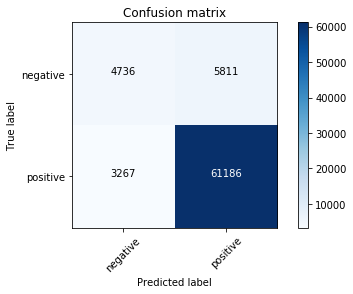

In [59]:
plot_confusion_matrix(confusion_matrix(y_test,pred2))

61186 are true positve and 3267 are true negative

In [60]:
f1=f1_score(y_test,pred2)
print("F1-score is %f " %f1)

F1-score is 0.930940 


# Conclusion

Naive Bayes  Model On Amazon food reviews for 250k points

BernoulliNaiveBayes
 * Optimal Alpha=0.872049
 * Accuracy=87.249333
 * precision=91.376451
 * F1-score=0.926879 
 * Recall=0.940375
 
 
MultinomialNaiveBayes:
 * optimal alpha= 0.878237
 * accuracy=87.896000
 * precision=91.326477
 * Recall=0.949312
 * F1-score=0.930940 
 